## 1.Setup Basic Parameters

In [1]:
# Step 1: Load and read the JSON file to extract new parameters
import json

# Path to the JSON file with new parameters
json_path = 'Data1.json'

# Read the JSON file
with open(json_path, 'r') as file:
    parameters = json.load(file)

# Display the loaded parameters to confirm
parameters

{'TMax': 60,
 'D': 16,
 'L': 1,
 'ls': 10,
 'le': 20,
 'alfa': 0.6,
 'beta': 0.2,
 'gama': 0.3,
 'Connectivity Matrix W': {'Outside World-FP,Suva-FP': 3000,
  'Outside World1-AP,Nadi International-AP': 4500,
  'Denarau-FP,Group 4 (Tropica/Malolo/Likuliku/Castaway)-FP': 500,
  'Denarau-FP,Bounty Island-FP': 200,
  'Denarau-FP,Tokoriki Island-FP': 150,
  'Denarau-FP,Group 2 (Tadrai/Mana)-FP': 300,
  'Denarau-FP,Group 3 (Treasure/Beachconber)-FP': 200,
  'Denarau-FP,Matamanoa Island-FP': 80,
  'Natovi Jetty-FP,Nabouwalu-FP': 1200,
  'Lautoka-FP,Group 1 (Paradise/MantaRay/Barefoot)-FP': 700,
  'Lautoka-FP,Coralview Island-FP': 600,
  'Lautoka-FP,Octopus Resort-FP': 150,
  'Group 4 (Tropica/Malolo/Likuliku/Castaway)-FP,Bounty Island-FP': 50,
  'Group 4 (Tropica/Malolo/Likuliku/Castaway)-FP,Group 2 (Tadrai/Mana)-FP': 80,
  'Bounty Island-FP,Group 2 (Tadrai/Mana)-FP': 70,
  'Bounty Island-FP,Group 3 (Treasure/Beachconber)-FP': 50,
  'Suva-FP,Kadavu-FP': 2500,
  'Group 1 (Paradise/MantaRay/Bar

In [2]:
import numpy as np

# Parameters
Tmax = parameters['TMax'] #time frame
D = parameters['D']  # Number of locations
L = parameters['L']  # Number of locations connected to the outside world
Tmax, D, L

(60, 16, 1)

## 2. Create Connectivity Matrix W

In [3]:
import pandas as pd

def extract_locations(parameters):
    # This function extracts all unique locations from the keys of the connectivity matrix in the order they appear
    locations_ordered = []
    seen_locations = set()
    for key in parameters['Connectivity Matrix W'].keys():
        # Split the key on the comma
        places = key.split(',')
        for place in places:
            place_cleaned = place.strip()
            if place_cleaned not in seen_locations:
                seen_locations.add(place_cleaned)
                locations_ordered.append(place_cleaned)
    return locations_ordered

def create_index_mapping(locations):
    # This function creates a dictionary that maps location names to indices
    return {location: index for index, location in enumerate(locations)}

def create_connectivity_matrix(parameters, location_to_index):
    D = len(location_to_index)  # The number of locations
    W = np.zeros((D, D), dtype=int)  # Initialize the connectivity matrix with zeros

    # Populate the connectivity matrix using the index mapping
    for key, value in parameters['Connectivity Matrix W'].items():
        places = key.split(',')
        i = location_to_index[places[0].strip()]
        j = location_to_index[places[1].strip()]
        W[i, j] = value

    # Make the matrix symmetrical
    W = W + W.T

    # Ensure the diagonal is zero
    np.fill_diagonal(W, 0)
    return W

# Extract locations in the order they appear in the JSON file
locations_ordered = extract_locations(parameters)
# Create a mapping from location names to indices
location_to_index = create_index_mapping(locations_ordered)

# Create the connectivity matrix
W = create_connectivity_matrix(parameters, location_to_index)

# Create a DataFrame from the connectivity matrix with the ordered locations
W_df = pd.DataFrame(W, index=locations_ordered, columns=locations_ordered)

W_df

,Outside World-FP,Suva-FP,Outside World1-AP,Nadi International-AP,Denarau-FP,Group 4 (Tropica/Malolo/Likuliku/Castaway)-FP,Bounty Island-FP,Tokoriki Island-FP,Group 2 (Tadrai/Mana)-FP,Group 3 (Treasure/Beachconber)-FP,Matamanoa Island-FP,Natovi Jetty-FP,Nabouwalu-FP,Lautoka-FP,Group 1 (Paradise/MantaRay/Barefoot)-FP,Coralview Island-FP,Octopus Resort-FP,Kadavu-FP
Outside World-FP,0,3000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Suva-FP,3000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2500
Outside World1-AP,0,0,0,4500,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Nadi International-AP,0,0,4500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Denarau-FP,0,0,0,0,0,500,200,150,300,200,80,0,0,0,0,0,0,0
Group 4 (Tropica/Malolo/Likuliku/Castaway)-FP,0,0,0,0,500,0,50,0,80,0,0,0,0,0,0,0,0,0
Bounty Island-FP,0,0,0,0,200,50,0,0,70,50,0,0,0,0,0,0,0,0
Tokoriki Island-FP,0,0,0,0,150,0,0,0,0,40,20,0,0,0,0,0,0,0
Group 2 (Tadrai/Mana)-FP,0,0,0,0,300,80,70,0,0,25,0,0,0,0,0,0,0,0
Group 3 (Treasure/Beachconber)-FP,0,0,0,0,200,0,50,40,25,0,30,0,0,0,150,0,0,0


In [4]:
def calculate_n_for_outside_world(parameters, W_df):
    # Get the ports belonging to the "Outside World" from the JSON file
    outside_world_ports = parameters['ports_according_communities']['Outside World']
    total_connections = 0

    # Iterate over each connection in the connectivity matrix
    for connection, value in parameters['Connectivity Matrix W'].items():
        # Split port names on each connection
        source, destination = connection.split(',')
        # If the port of origin or destination is one of the ports of the "Outside World", add its value
        if source.strip() in outside_world_ports or destination.strip() in outside_world_ports:
            total_connections += value

    # Return the total number of connections for the "Outside World".
    return total_connections

#Initialize n_per_community with the values of 'n' from the JSON file
n_per_community = parameters['n']

# Calculate the value of 'n' for the "Outside World".
n_outside_world = calculate_n_for_outside_world(parameters, W_df)

In [5]:
# Update the dictionary with the value of 'n' for the "Outside World".
n_per_community["Outside World"] = n_outside_world

# Print all values of 'n' for each population
for community, n_value in n_per_community.items():
    print(f'{community}: {n_value}')

Nadi: 59717
Sawakasa: 53614
Vuda(Lautoka): 98264
Malolo(Tropica/Malolo/Likuliku/Castaway): 1961
Vuda(Bounty Island): 600
Suva: 94088
Naviti(Paradise/MantaRay/Barefoot): 2410
Malolo(Tokoriki Island): 300
Malolo(Tadrai/Mana): 800
Vuda(Treasure/Beachconber): 400
Yasawa: 2226
Malolo(Matamanoa Island): 150
Naviti: 500
Bua/Macuata/Cakaudrove: 124994
Kadavu: 10869
Outside World: 7500


In [6]:
# Reverse mapping of ports to communities to facilitate grouping by community in the connectivity matrix.
port_to_community = {}
for community, ports in parameters['ports_according_communities'].items():
    for port in ports:
        port_to_community[port] = community

# Initialize the community connectivity matrix
community_names = list(parameters['ports_according_communities'].keys())
community_index = {name: i for i, name in enumerate(community_names)}
community_connectivity = np.zeros((len(community_names), len(community_names)), dtype=int)

# Fill the matrix based on the connections between ports, grouping by communities.
for (port_from_to, passengers) in parameters['Connectivity Matrix W'].items():
    port_from, port_to = port_from_to.split(',')
    community_from = port_to_community[port_from.strip()]
    community_to = port_to_community[port_to.strip()]
    i = community_index[community_from]
    j = community_index[community_to]
    community_connectivity[i, j] += passengers
    community_connectivity[j, i] += passengers  # Assuming bidirectional connection

# Convert community connectivity matrix to DataFrame for better visualization.
community_connectivity_df = pd.DataFrame(community_connectivity, index=community_names, columns=community_names)

# Update 'n_per_community' with the calculated population of "Outside World".
n_per_community = parameters['n']
n_per_community["Outside World"] = n_outside_world

community_connectivity_df

,Outside World,Nadi,Sawakasa,Vuda(Lautoka),Malolo(Tropica/Malolo/Likuliku/Castaway),Vuda(Bounty Island),Suva,Naviti(Paradise/MantaRay/Barefoot),Malolo(Tokoriki Island),Malolo(Tadrai/Mana),Vuda(Treasure/Beachconber),Yasawa,Malolo(Matamanoa Island),Bua/Macuata/Cakaudrove,Naviti,Kadavu
Outside World,0,4500,0,0,0,0,3000,0,0,0,0,0,0,0,0,0
Nadi,4500,0,0,0,500,200,0,0,150,300,200,0,80,0,0,0
Sawakasa,0,0,0,0,0,0,0,0,0,0,0,0,0,1200,0,0
Vuda(Lautoka),0,0,0,0,0,0,0,700,0,0,0,600,0,0,150,0
Malolo(Tropica/Malolo/Likuliku/Castaway),0,500,0,0,0,50,0,0,0,80,0,0,0,0,0,0
Vuda(Bounty Island),0,200,0,0,50,0,0,0,0,70,50,0,0,0,0,0
Suva,3000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2500
Naviti(Paradise/MantaRay/Barefoot),0,0,0,700,0,0,0,0,0,0,150,0,0,0,30,0
Malolo(Tokoriki Island),0,150,0,0,0,0,0,0,0,0,40,0,20,0,0,0
Malolo(Tadrai/Mana),0,300,0,0,80,70,0,0,0,0,25,0,0,0,0,0


## 3.Initialize State Vectors

In [7]:
# Convert the dictionary of communities to an ordered list of community names
communities_ordered = list(n_per_community.keys())

# Standard percentages for all communities
percentages_standard = np.array([0.80, 0.05, 0.05, 0.10])  # Susceptible, Exposed, Infected, Recovered

# Specific percentages for the "Outside World"
percentages_outside_world = np.array([0.60, 0.15, 0.15, 0.10])  # Susceptible, Exposed, Infected, Recovered

# Initialize the state vectors
x = np.zeros((len(communities_ordered), 4), dtype=float)  # use float for state vectors

for i, community in enumerate(communities_ordered):
    n = n_per_community[community]  # Obtain the value of n for the current community
    if community == "Outside World":
        # Use specific percentages for the "Outside World".
        x[i] = percentages_outside_world * n
    elif n == 0:
        x[i] = np.zeros(4)  # Set explicitly to zero for locations with zero population
    else:
        # Allocate standard percentages for other communities
        x[i] = percentages_standard * n  # Scaling through the population

    x[i] = np.round(x[i]).astype(int)  # Round to whole

# Convertir los vectores de estado a un DataFrame para una mejor visualización
state_vectors_df = pd.DataFrame(x, columns=['Susceptible', 'Exposed', 'Infected', 'Recovered'], 
                                index=communities_ordered)

state_vectors_df

,Susceptible,Exposed,Infected,Recovered
Nadi,47774.0,2986.0,2986.0,5972.0
Sawakasa,42891.0,2681.0,2681.0,5361.0
Vuda(Lautoka),78611.0,4913.0,4913.0,9826.0
Malolo(Tropica/Malolo/Likuliku/Castaway),1569.0,98.0,98.0,196.0
Vuda(Bounty Island),480.0,30.0,30.0,60.0
Suva,75270.0,4704.0,4704.0,9409.0
Naviti(Paradise/MantaRay/Barefoot),1928.0,120.0,120.0,241.0
Malolo(Tokoriki Island),240.0,15.0,15.0,30.0
Malolo(Tadrai/Mana),640.0,40.0,40.0,80.0
Vuda(Treasure/Beachconber),320.0,20.0,20.0,40.0


## 4. Lockdown Logic

In [8]:
def update_community_connectivity_df(W_df, ports_according_communities, port_to_community):
    community_names = list(ports_according_communities.keys())
    community_connectivity = np.zeros((len(community_names), len(community_names)), dtype=int)
    
    community_index = {name: i for i, name in enumerate(community_names)}
    
    for port_from in W_df.index:
        for port_to in W_df.columns:
            if W_df.loc[port_from, port_to] > 0:
                community_from = port_to_community.get(port_from, "")
                community_to = port_to_community.get(port_to, "")
                if community_from and community_to:
                    i = community_index[community_from]
                    j = community_index[community_to]
                    community_connectivity[i, j] += W_df.loc[port_from, port_to]
    
    return pd.DataFrame(community_connectivity, index=community_names, columns=community_names)

In [9]:
original_W_df = W_df.copy()  # Hace una copia de W_df antes de aplicar cualquier lockdown

In [10]:
def apply_lockdown_and_update(lockdown_ports, reduction_factor=0.1):
    global W_df, community_connectivity_df
    W_df = original_W_df.copy()  # Restore W_df to its original state
    
    # Apply the reduction factor to the connectivity of the lockdown ports
    for port in lockdown_ports:
        connected_ports = W_df[port].index.tolist()
        W_df.loc[port, connected_ports] *= reduction_factor
        W_df.loc[connected_ports, port] *= reduction_factor
    
    # Recalculate community_connectivity_df
    community_connectivity_df = update_community_connectivity_df(W_df, parameters['ports_according_communities'], port_to_community)


In [11]:
# Ejemplo de uso:
lockdown_ports = ["Nadi International-AP"]  # Inicialmente aplicar lockdowns
apply_lockdown_and_update(lockdown_ports)

In [12]:
# Recalcula community_connectivity_df
community_connectivity_df = update_community_connectivity_df(W_df, parameters['ports_according_communities'], port_to_community)

In [13]:
community_connectivity_df

,Outside World,Nadi,Sawakasa,Vuda(Lautoka),Malolo(Tropica/Malolo/Likuliku/Castaway),Vuda(Bounty Island),Suva,Naviti(Paradise/MantaRay/Barefoot),Malolo(Tokoriki Island),Malolo(Tadrai/Mana),Vuda(Treasure/Beachconber),Yasawa,Malolo(Matamanoa Island),Bua/Macuata/Cakaudrove,Naviti,Kadavu
Outside World,0,450,0,0,0,0,3000,0,0,0,0,0,0,0,0,0
Nadi,450,0,0,0,500,200,0,0,150,300,200,0,80,0,0,0
Sawakasa,0,0,0,0,0,0,0,0,0,0,0,0,0,1200,0,0
Vuda(Lautoka),0,0,0,0,0,0,0,700,0,0,0,600,0,0,150,0
Malolo(Tropica/Malolo/Likuliku/Castaway),0,500,0,0,0,50,0,0,0,80,0,0,0,0,0,0
Vuda(Bounty Island),0,200,0,0,50,0,0,0,0,70,50,0,0,0,0,0
Suva,3000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2500
Naviti(Paradise/MantaRay/Barefoot),0,0,0,700,0,0,0,0,0,0,150,0,0,0,30,0
Malolo(Tokoriki Island),0,150,0,0,0,0,0,0,0,0,40,0,20,0,0,0
Malolo(Tadrai/Mana),0,300,0,0,80,70,0,0,0,0,25,0,0,0,0,0


In [14]:
def adjust_n_for_outside_world_after_lockdowns(W_df, parameters, lockdown_ports):
    new_connections_outside_world = 0
    outside_world_ports = parameters['ports_according_communities']['Outside World']
    
    # Sumar solo las conexiones entrantes o salientes para los puertos de "Outside World"
    for port in outside_world_ports:
        if port not in lockdown_ports:
            # Suponiendo que las conexiones son simétricas, sumamos solo una vez
            new_connections_outside_world += W_df[port].sum()
    
    # No necesitamos restar las conexiones doblemente contadas si solo sumamos una vez

    # Si hay puertos en lockdown que conectan con "Outside World", debemos restar esas conexiones
    for lockdown_port in lockdown_ports:
        if lockdown_port in W_df.columns:
            # Restamos la columna completa si el puerto está en lockdown
            new_connections_outside_world -= W_df[lockdown_port].sum()

    # Actualizar la población de "Outside World"
    n_per_community["Outside World"] = new_connections_outside_world

In [15]:
# Ahora, recalcula la población de "Outside World" basándose en el estado actualizado de W_df
adjust_n_for_outside_world_after_lockdowns(W_df, parameters, lockdown_ports)

In [16]:
print("Poblaciones actualizadas por comunidad después del lockdown:")
for community, n_value in n_per_community.items():
    print(f"{community}: {n_value}")

Poblaciones actualizadas por comunidad después del lockdown:
Nadi: 59717
Sawakasa: 53614
Vuda(Lautoka): 98264
Malolo(Tropica/Malolo/Likuliku/Castaway): 1961
Vuda(Bounty Island): 600
Suva: 94088
Naviti(Paradise/MantaRay/Barefoot): 2410
Malolo(Tokoriki Island): 300
Malolo(Tadrai/Mana): 800
Vuda(Treasure/Beachconber): 400
Yasawa: 2226
Malolo(Matamanoa Island): 150
Naviti: 500
Bua/Macuata/Cakaudrove: 124994
Kadavu: 10869
Outside World: 3000


In [17]:
# Paso previo: Asumir que x es inicialmente un array numpy con las dimensiones correctas.
for i, community in enumerate(communities_ordered):
    total_population = n_per_community[community]  # Nueva población total para la comunidad
    proportions = x[i] / sum(x[i])  # Proporciones actuales de los estados de salud
    x[i] = (proportions * total_population).astype(int)  # Ajustar x basado en las nuevas poblaciones


In [18]:
#def simulate_population_movement(W_df, x, communities_ordered, port_to_community, n_per_community):
    # Ajustar x basándose en n_per_community actualizado.
x_df = pd.DataFrame(x, index=communities_ordered, columns=['Susceptible', 'Exposed', 'Infected', 'Recovered'])
    


In [19]:
x_df

,Susceptible,Exposed,Infected,Recovered
Nadi,47773.0,2985.0,2985.0,5971.0
Sawakasa,42891.0,2681.0,2681.0,5361.0
Vuda(Lautoka),78611.0,4913.0,4913.0,9826.0
Malolo(Tropica/Malolo/Likuliku/Castaway),1569.0,98.0,98.0,196.0
Vuda(Bounty Island),480.0,30.0,30.0,60.0
Suva,75270.0,4704.0,4704.0,9409.0
Naviti(Paradise/MantaRay/Barefoot),1928.0,120.0,120.0,241.0
Malolo(Tokoriki Island),240.0,15.0,15.0,30.0
Malolo(Tadrai/Mana),640.0,40.0,40.0,80.0
Vuda(Treasure/Beachconber),320.0,20.0,20.0,40.0


## 5. Implement the Migration Logic

In [20]:
def balanced_migration_step(W_df, x, communities_ordered, port_to_community, n_per_community):
    D = len(communities_ordered)
    Delta_out = np.zeros_like(x)  # Matriz de cambios salientes
    Delta_in = np.zeros_like(x)   # Matriz de cambios entrantes

    # Migración balanceada entre comunidades usando .iloc para acceder a W_df con índices enteros
    for i in range(D):
        for j in range(D):
            if i != j:
                # Asegúrate de obtener el valor correcto de la matriz W_df
                migration_value = W_df.iloc[i, j]
                if migration_value > 0:
                    # Calcula la proporción de individuos que se moverán de i a j
                    for cat in range(4):  # Para cada categoría de estado de salud
                        moving_pop = min(migration_value, n_per_community[communities_ordered[i]], x[i, cat])
                        Delta_out[i, cat] += moving_pop
                        Delta_in[j, cat] += moving_pop

    # Asegurar que no se supere la población total de la comunidad origen y destino
    for i in range(D):
        for cat in range(4):
            Delta_out[i, cat] = min(Delta_out[i, cat], x[i, cat])  # No mover más de lo que hay en la comunidad origen
            Delta_in[i, cat] = min(Delta_in[i, cat], n_per_community[communities_ordered[i]] - x[i, cat])  # No exceder capacidad en la comunidad destino

    # Actualizar las poblaciones después de la migración
    x_new = x - np.round(Delta_out).astype(int) + np.round(Delta_in).astype(int)
    x_new = np.clip(x_new, 0, np.array(list(n_per_community.values()))[:, None])  # Asegura que las poblaciones no sean negativas ni excedan n_per_community

    return x_new


In [21]:
# Asegúrate de tener todas las variables y funciones necesarias definidas.
# A continuación, ejecuta la función de migración balanceada para obtener x_new.
x_new = balanced_migration_step(W_df, x, communities_ordered, port_to_community, n_per_community)

# Ahora que x_new está definida, puedes crear un DataFrame y luego imprimirlo.
x_new_df = pd.DataFrame(x_new, index=communities_ordered, columns=['Susceptible', 'Exposed', 'Infected', 'Recovered'])


In [22]:
x_new_df

,Susceptible,Exposed,Infected,Recovered
Nadi,47773.0,2681.0,2681.0,5971.0
Sawakasa,42891.0,2985.0,2985.0,5361.0
Vuda(Lautoka),78611.0,4561.0,4561.0,9572.0
Malolo(Tropica/Malolo/Likuliku/Castaway),1511.0,450.0,450.0,450.0
Vuda(Bounty Island),120.0,570.0,570.0,540.0
Suva,75250.0,4194.0,4194.0,8969.0
Naviti(Paradise/MantaRay/Barefoot),1928.0,140.0,140.0,220.0
Malolo(Tokoriki Island),90.0,70.0,70.0,120.0
Malolo(Tadrai/Mana),325.0,200.0,200.0,235.0
Vuda(Treasure/Beachconber),80.0,300.0,300.0,345.0


## 6. Implement Infection Dynamics

In [23]:
def infection_step(x_new, lockdown=False):
    # Define las tasas de transmisión, recuperación y progresión de la enfermedad.
    α = parameters['alfa'] * (0.5 if lockdown else 1)  # La tasa de transmisión se ajusta si hay lockdown.
    β = parameters['beta']  # Tasa de recuperación
    γ = parameters['gama']  # Tasa de progresión de expuestos a infecciosos

    # D es el número total de comunidades.
    D = x_new.shape[0]
    
    # Inicializa una matriz para almacenar los estados actualizados después del paso de infección.
    x_updated = np.zeros_like(x_new)

    for i in range(D):
        # Calcula la población total de la comunidad i.
        n = x_new[i, :].sum()
        
        if n > 0:
            # Extrae los estados individuales para la comunidad i.
            S, E, I, R = x_new[i, 0], x_new[i, 1], x_new[i, 2], x_new[i, 3]

            # Calcula las transiciones entre los estados basado en las tasas y la población actual.
            δ_SE = np.random.binomial(S, α*I/n if n > 0 else 0)  # Susceptibles que se convierten en expuestos
            δ_EI = np.random.binomial(E, γ)  # Expuestos que se convierten en infectados
            δ_IR = np.random.binomial(I, β)  # Infectados que se recuperan

            # Actualiza los estados para la comunidad i basado en las transiciones calculadas.
            x_updated[i] = [S - δ_SE, E + δ_SE - δ_EI, I + δ_EI - δ_IR, R + δ_IR]
    
    return x_updated


## 7. Run the Simulation

In [24]:
# Parámetros de lockdown leídos del JSON
lockdown_start = parameters['ls']
lockdown_end = lockdown_start + parameters['le']

# Inicializar el arreglo de historial
history = np.zeros((parameters['TMax'], len(communities_ordered), 4), dtype=float)

# Ejecutar la simulación
for t in range(parameters['TMax']):
    # Check if current day is within the lockdown period
    is_lockdown = lockdown_start <= t < lockdown_end
    
    # If we are in the lockdown period, apply lockdown
    if is_lockdown:
        apply_lockdown_and_update(lockdown_ports, reduction_factor=0.1)
    else:
        # If we are not in the lockdown period, reset the connectivity
        apply_lockdown_and_update(lockdown_ports, reduction_factor=1)

    # Execute the balanced migration and infection steps using the updated W_df
    x_new = balanced_migration_step(W_df, x, communities_ordered, port_to_community, n_per_community)
    x_updated = infection_step(x_new, lockdown=is_lockdown)
    
    # Update the state vectors for the next iteration
    x = x_updated
    
    # Record the state for the day t
    history[t] = x_updated


# Convertir el historial a un DataFrame para una visualización más clara
days = [f"Day {i + 1}" for i in range(parameters['TMax'])]
locations = communities_ordered
index = pd.MultiIndex.from_product([days, locations], names=['Day', 'Location'])
history_reshaped = history.reshape(parameters['TMax'] * len(communities_ordered), 4)
history_df = pd.DataFrame(history_reshaped, columns=['Susceptible', 'Exposed', 'Infected', 'Recovered'], index=index)


In [25]:
history_df

Susceptible  Exposed  \
Day    Location                                                         
Day 1  Nadi                                          46456.0   3235.0   
       Sawakasa                                      41414.0   3596.0   
       Vuda(Lautoka)                                 75410.0    608.0   
       Malolo(Tropica/Malolo/Likuliku/Castaway)        329.0   1339.0   
       Vuda(Bounty Island)                              96.0    423.0   
...                                                      ...      ...   
Day 60 Malolo(Matamanoa Island)                         29.0      2.0   
       Naviti                                            9.0      0.0   
       Bua/Macuata/Cakaudrove                        20205.0    988.0   
       Kadavu                                          805.0    665.0   
       Outside World                                   534.0    489.0   

                                                 Infected  Recovered  
Day    Location                                                       
Day 1  Nadi                                        2889.0     6526.0  
       Sawakasa                                    3232.0     5980.0  
       Vuda(Lautoka)                                571.0     5635.0  
       Malolo(Tropica/Malolo/Likuliku/Castaway)    2092.0     2123.0  
       Vuda(Bounty Island)                          635.0      646.0  
...                                                   ...        ...  
Day 60 Malolo(Matamanoa Island)                       2.0       68.0  
       Naviti                                         0.0       83.0  
       Bua/Macuata/Cakaudrove                      1710.0    95899.0  
       Kadavu                                      1296.0    10266.0  
       Outside World                                857.0     2575.0  

[960 rows x 4 columns]

## 7. Plot

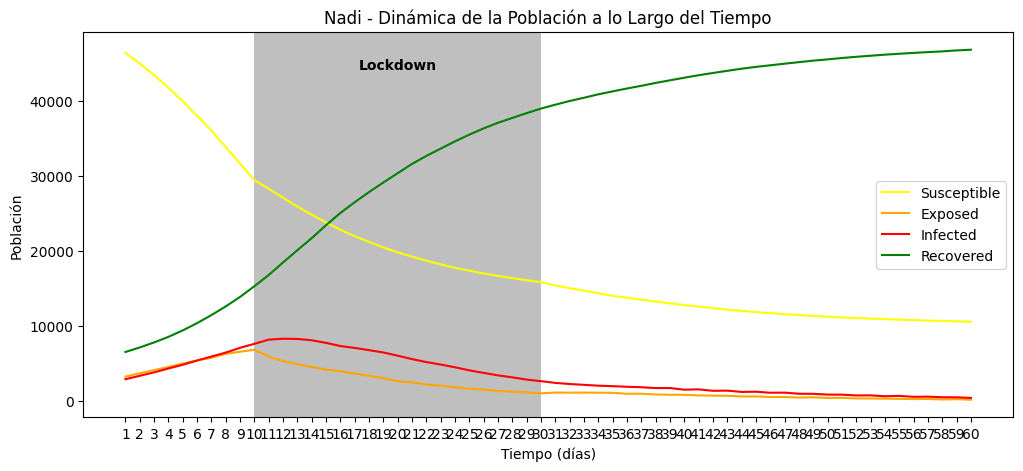

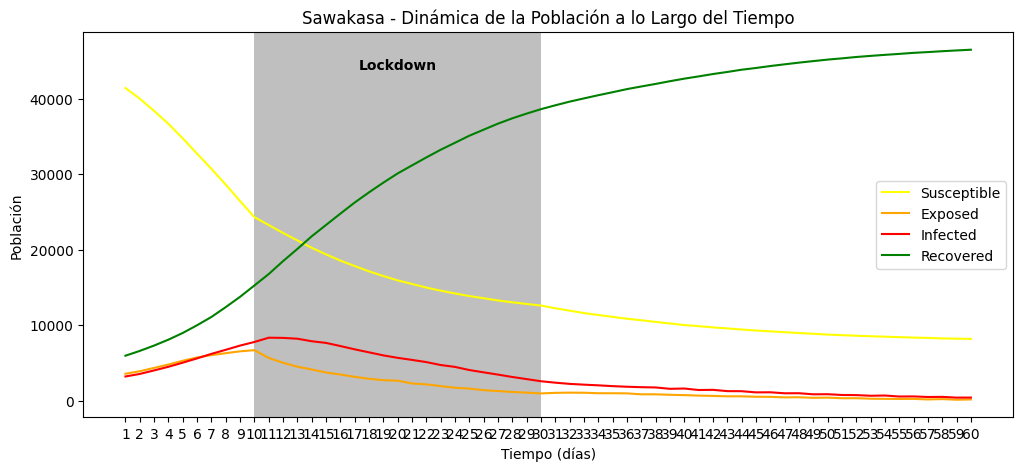

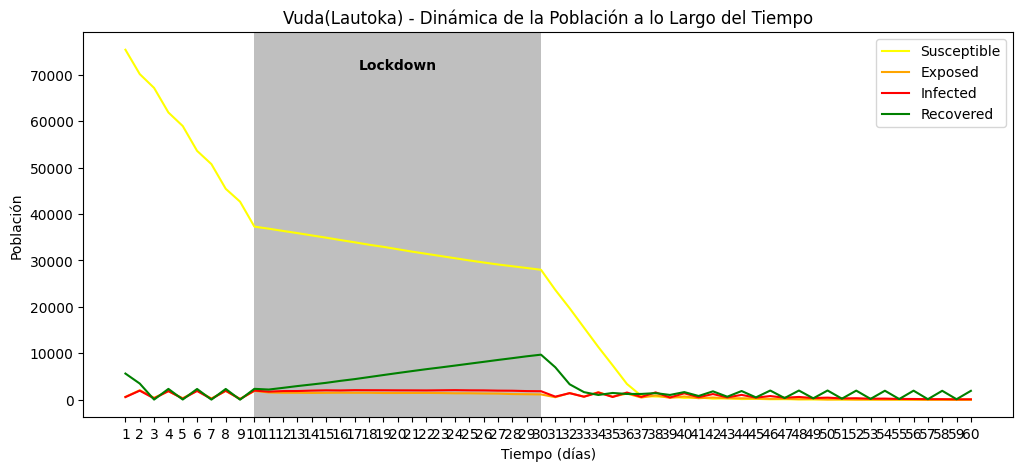

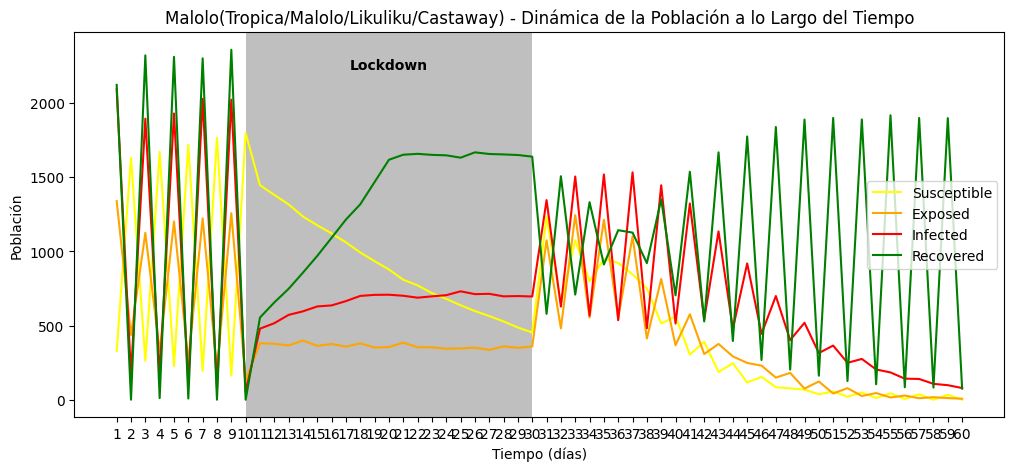

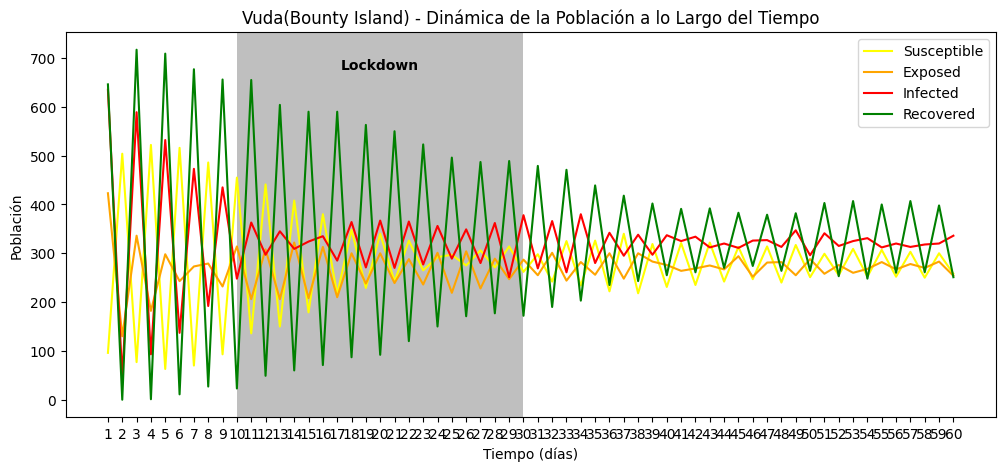

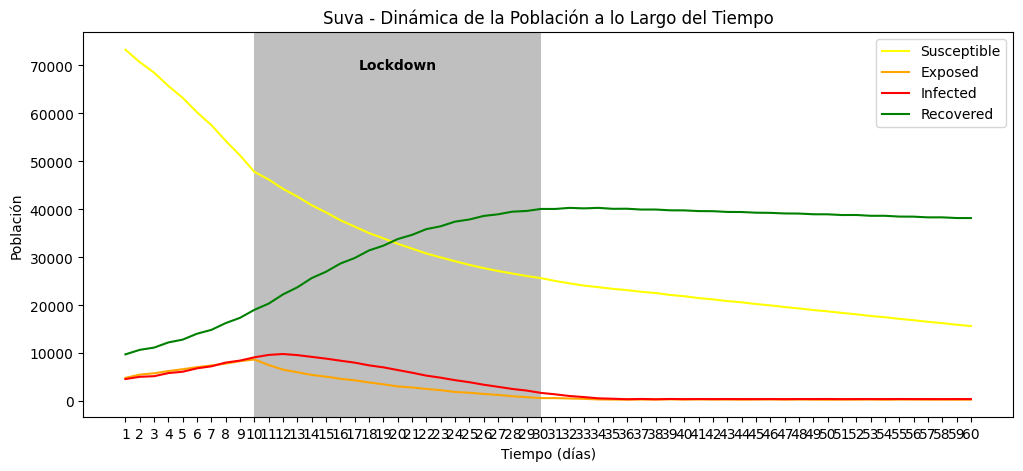

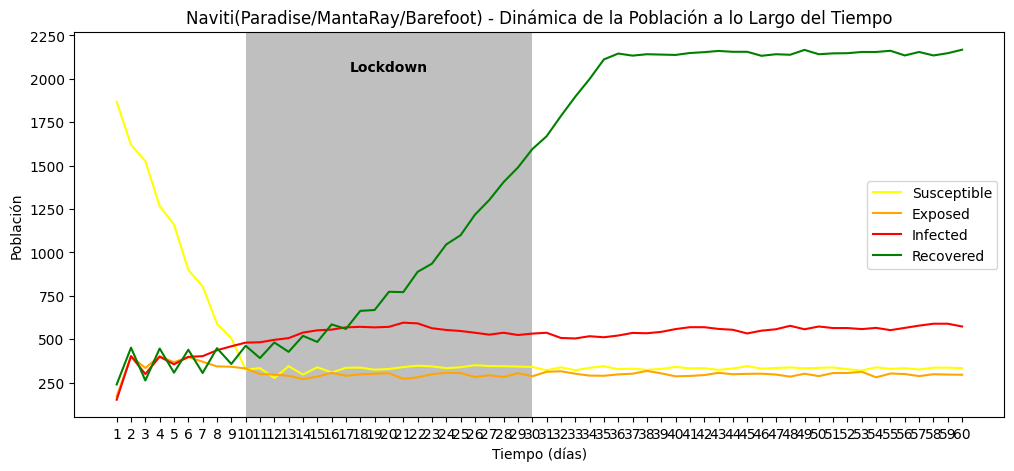

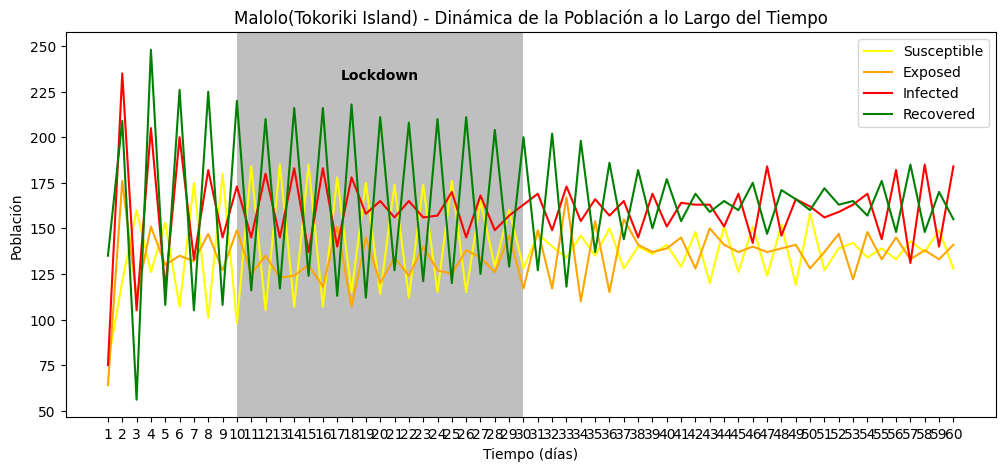

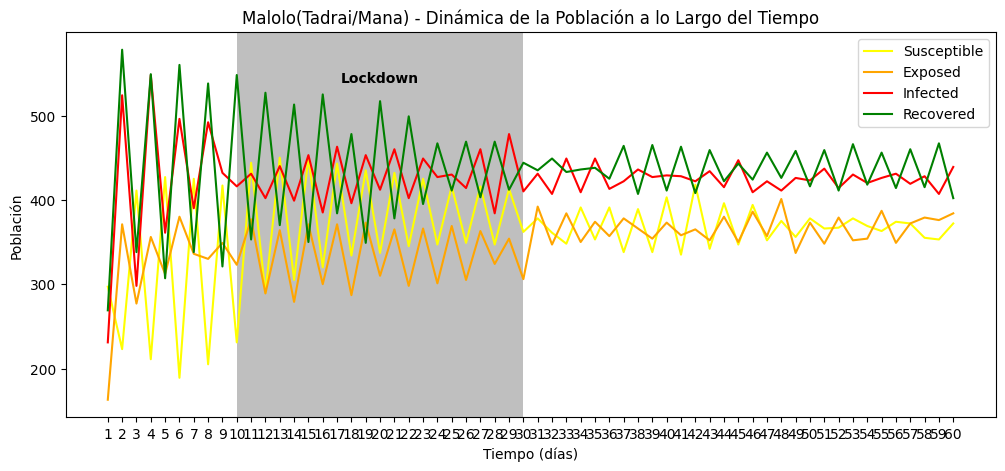

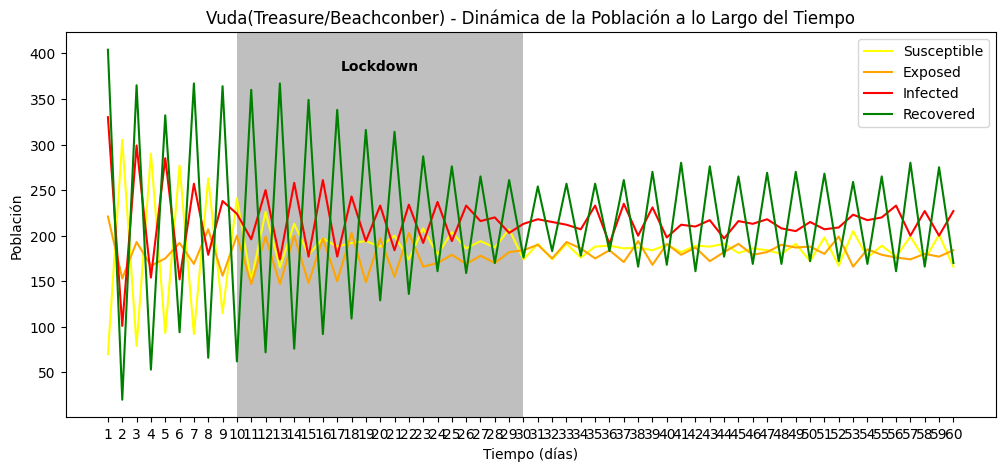

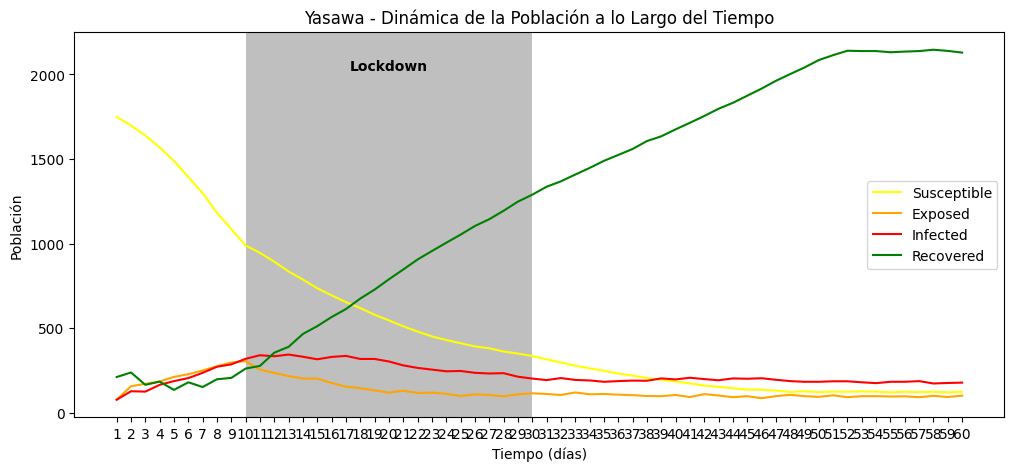

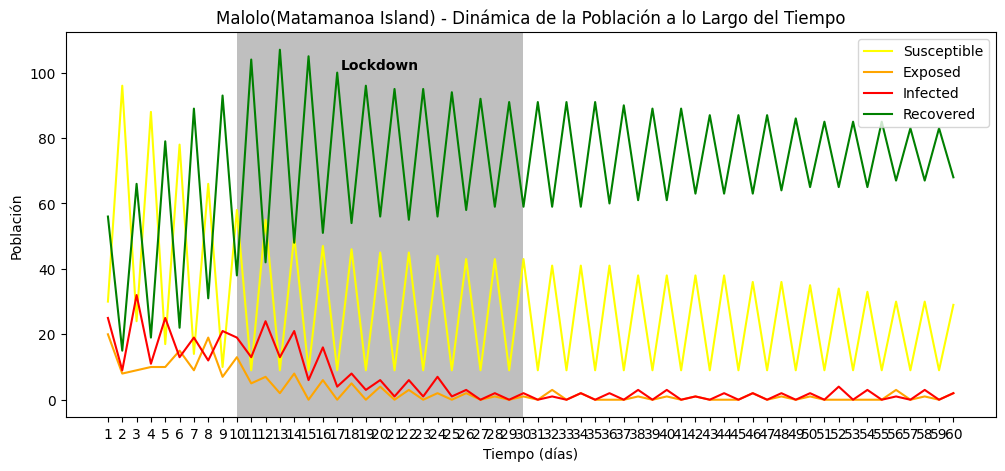

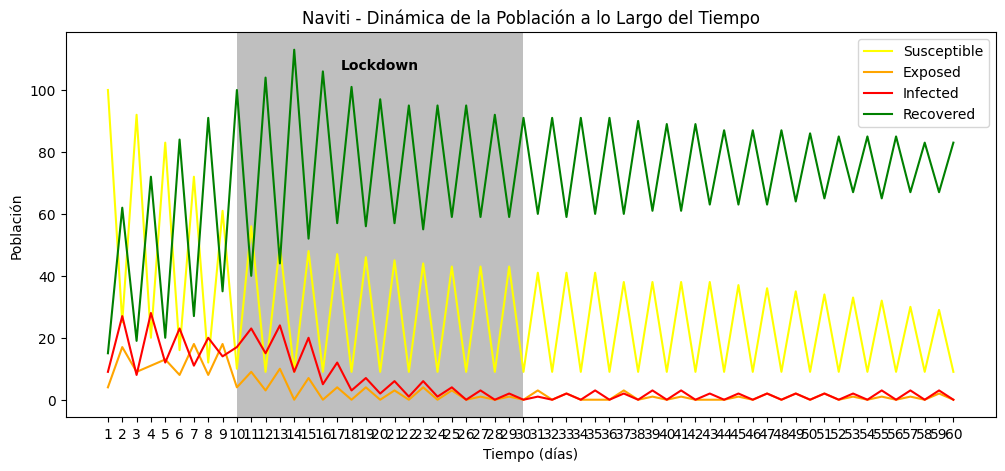

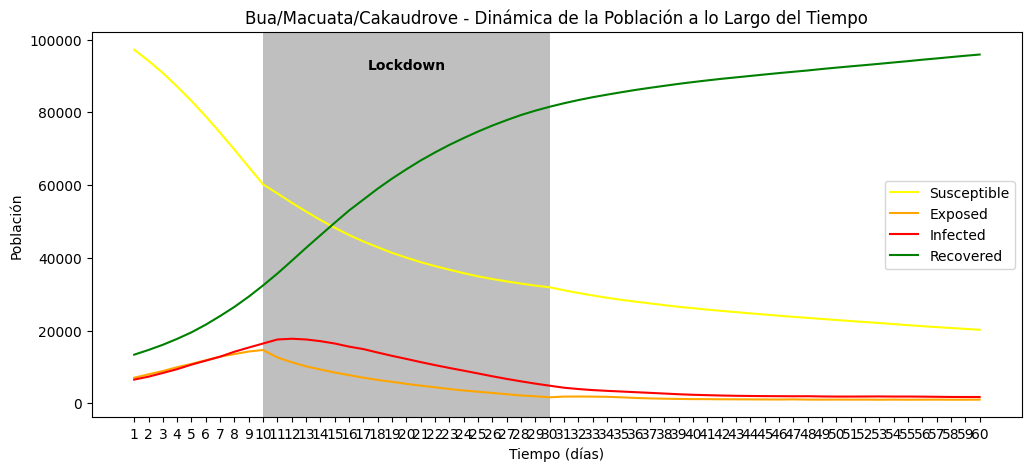

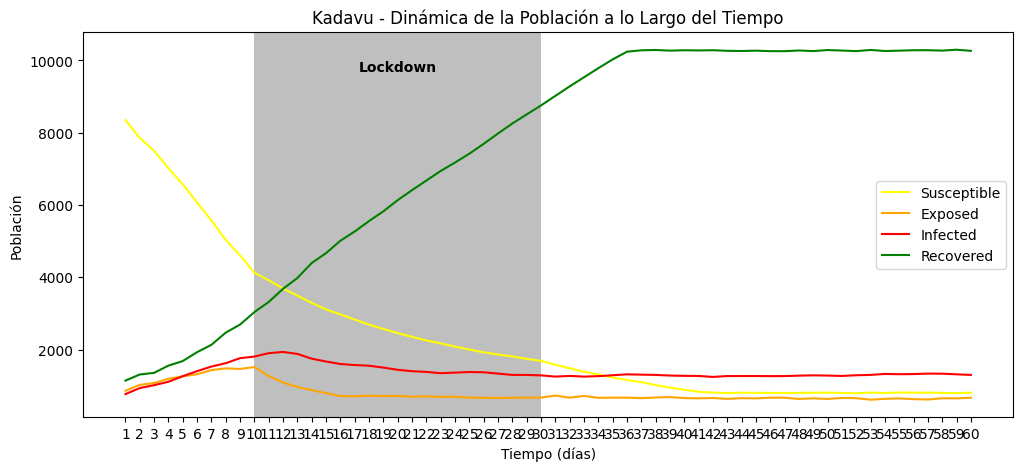

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# Etiquetas para los compartimentos de población
compartment_labels = ['Susceptible', 'Exposed', 'Infected', 'Recovered']
compartment_colors = ['yellow', 'orange', 'red', 'green']

# Parámetros de lockdown para marcar el período en los gráficos
lockdown_start = parameters['ls'] - 1  # Ajustar para indexación basada en cero
lockdown_end = parameters['le'] + lockdown_start

for i, community_name in enumerate(communities_ordered):
    if community_name == "Outside World":  # Skip plotting for 'Outside World'
        continue

    plt.figure(figsize=(12, 5))
    for j, (label, color) in enumerate(zip(compartment_labels, compartment_colors)):
        # Extraer los datos específicos del compartimento para cada comunidad
        compartment_data = history[:, i, j]
        days = np.arange(parameters['TMax'])  # Días de la simulación
        plt.plot(days, compartment_data, label=label, color=color)

    # Ajustar los ticks del eje x para mostrar los días desde 1
    plt.xticks(ticks=np.arange(0, parameters['TMax']), labels=np.arange(1, parameters['TMax'] + 1))

    plt.title(f"{community_name} - Dinámica de la Población a lo Largo del Tiempo")
    plt.xlabel("Tiempo (días)")
    plt.ylabel("Población")
    plt.legend()
    plt.grid(False)  # Para mejor visualización de la cuadrícula

    # Resaltar el período de lockdown en el gráfico de cada comunidad
    if 0 <= lockdown_start < parameters['TMax'] and 0 <= lockdown_end < parameters['TMax']:
        plt.axvspan(lockdown_start, lockdown_end, color='grey', alpha=0.5, lw=0)
        plt.text((lockdown_start + lockdown_end) / 2, plt.ylim()[1] * 0.9, 'Lockdown',
                 horizontalalignment='center', color='black', weight='bold')

    plt.show()
